In [1]:
import pandas as pd

2024-07-29 06:21:40,324 - INFO - Project root set to: /Users/rexcoleman/Documents/DataScienceAndMachineLearning/Rex_Coleman_Machine_Learning_Cybersecurity_Portfolio/Microsoft-Malware-Prediction-Project-2


Project root set to: /Users/rexcoleman/Documents/DataScienceAndMachineLearning/Rex_Coleman_Machine_Learning_Cybersecurity_Portfolio/Microsoft-Malware-Prediction-Project-2
Directory ensured: /Users/rexcoleman/Documents/DataScienceAndMachineLearning/Rex_Coleman_Machine_Learning_Cybersecurity_Portfolio/Microsoft-Malware-Prediction-Project-2/analysis_results

==== Data Overview ====




--- Contextual Insights and Recommendations ---

High-Level Overview: The dataset includes multiple data types such as integers, floats, and objects.
Detailed Technical Insights: Ensuring data types are correctly assigned is crucial for accurate analysis and modeling.
Actionable Recommendations: Verify and correct data types if necessary before further analysis.


2024-07-29 06:21:41,116 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-29 06:21:41,122 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



==== Target Variable Analysis: 'HasDetections' ====



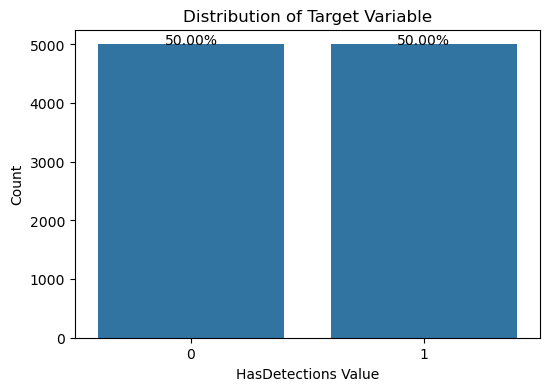

Distribution of 'HasDetections':
HasDetections
1    0.5
0    0.5
Name: proportion, dtype: float64

--- Contextual Insights and Recommendations ---

High-Level Overview: The target feature is relatively balanced.
Detailed Technical Insights: The balanced distribution is beneficial for model training as it reduces the risk of bias towards one class.
Actionable Recommendations: Proceed with model development without additional steps for handling class imbalance at this stage.


2024-07-29 06:21:41,565 - INFO - Figure saved to /Users/rexcoleman/Documents/DataScienceAndMachineLearning/Rex_Coleman_Machine_Learning_Cybersecurity_Portfolio/Microsoft-Malware-Prediction-Project-2/reports/analysis_results/missing_values_plot.png


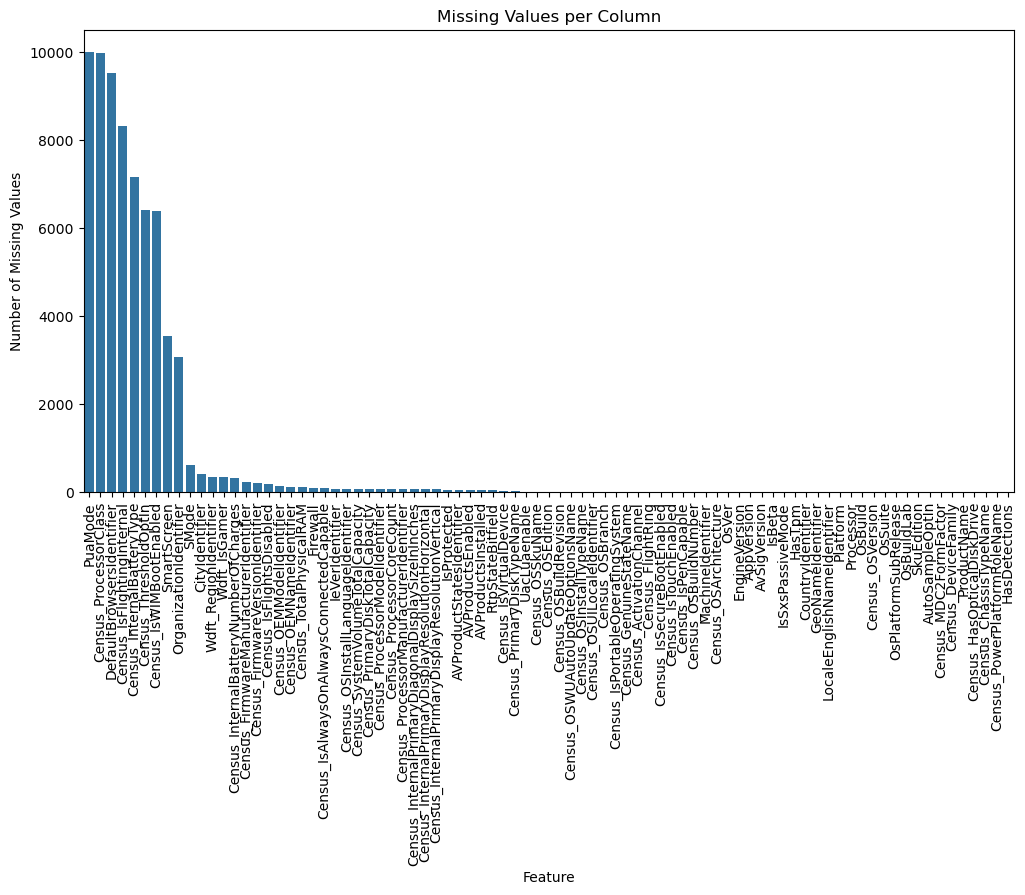


--- Contextual Insights and Recommendations ---

High-Level Overview: Several features have a high percentage of missing values, particularly 'PuaMode' and 'Census_ProcessorClass'.
Detailed Technical Insights: Features with a high percentage of missing values might need imputation strategies or could be excluded from the analysis if deemed irrelevant.
Actionable Recommendations: Develop a missing value treatment plan, focusing on imputation strategies or feature exclusion based on the importance and impact on the target variable.


2024-07-29 06:21:42,180 - INFO - Figure saved to /Users/rexcoleman/Documents/DataScienceAndMachineLearning/Rex_Coleman_Machine_Learning_Cybersecurity_Portfolio/Microsoft-Malware-Prediction-Project-2/reports/analysis_results/feature_balance_plot.png


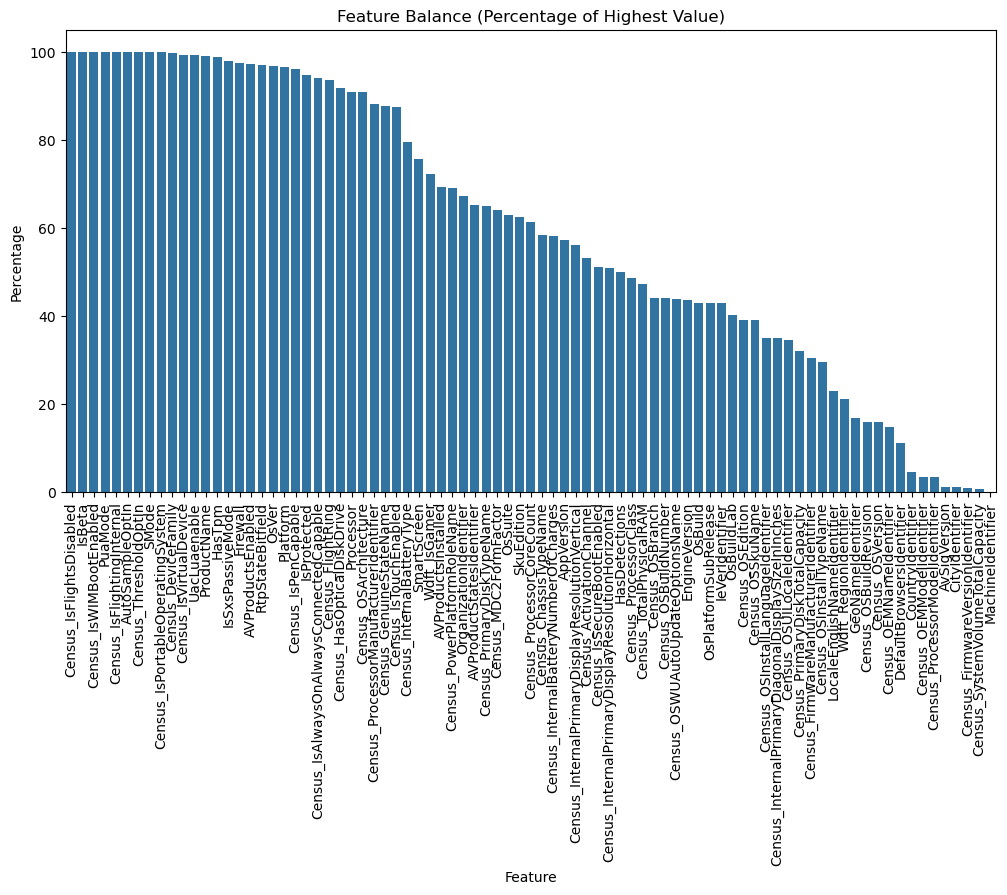


--- Contextual Insights and Recommendations ---

High-Level Overview: Many features show a high percentage of a single value, indicating potential imbalance.
Detailed Technical Insights: Imbalanced features can impact the performance of machine learning models, particularly in classification tasks.
Actionable Recommendations: Consider techniques to handle imbalanced features, such as resampling, feature engineering, or model adjustments.


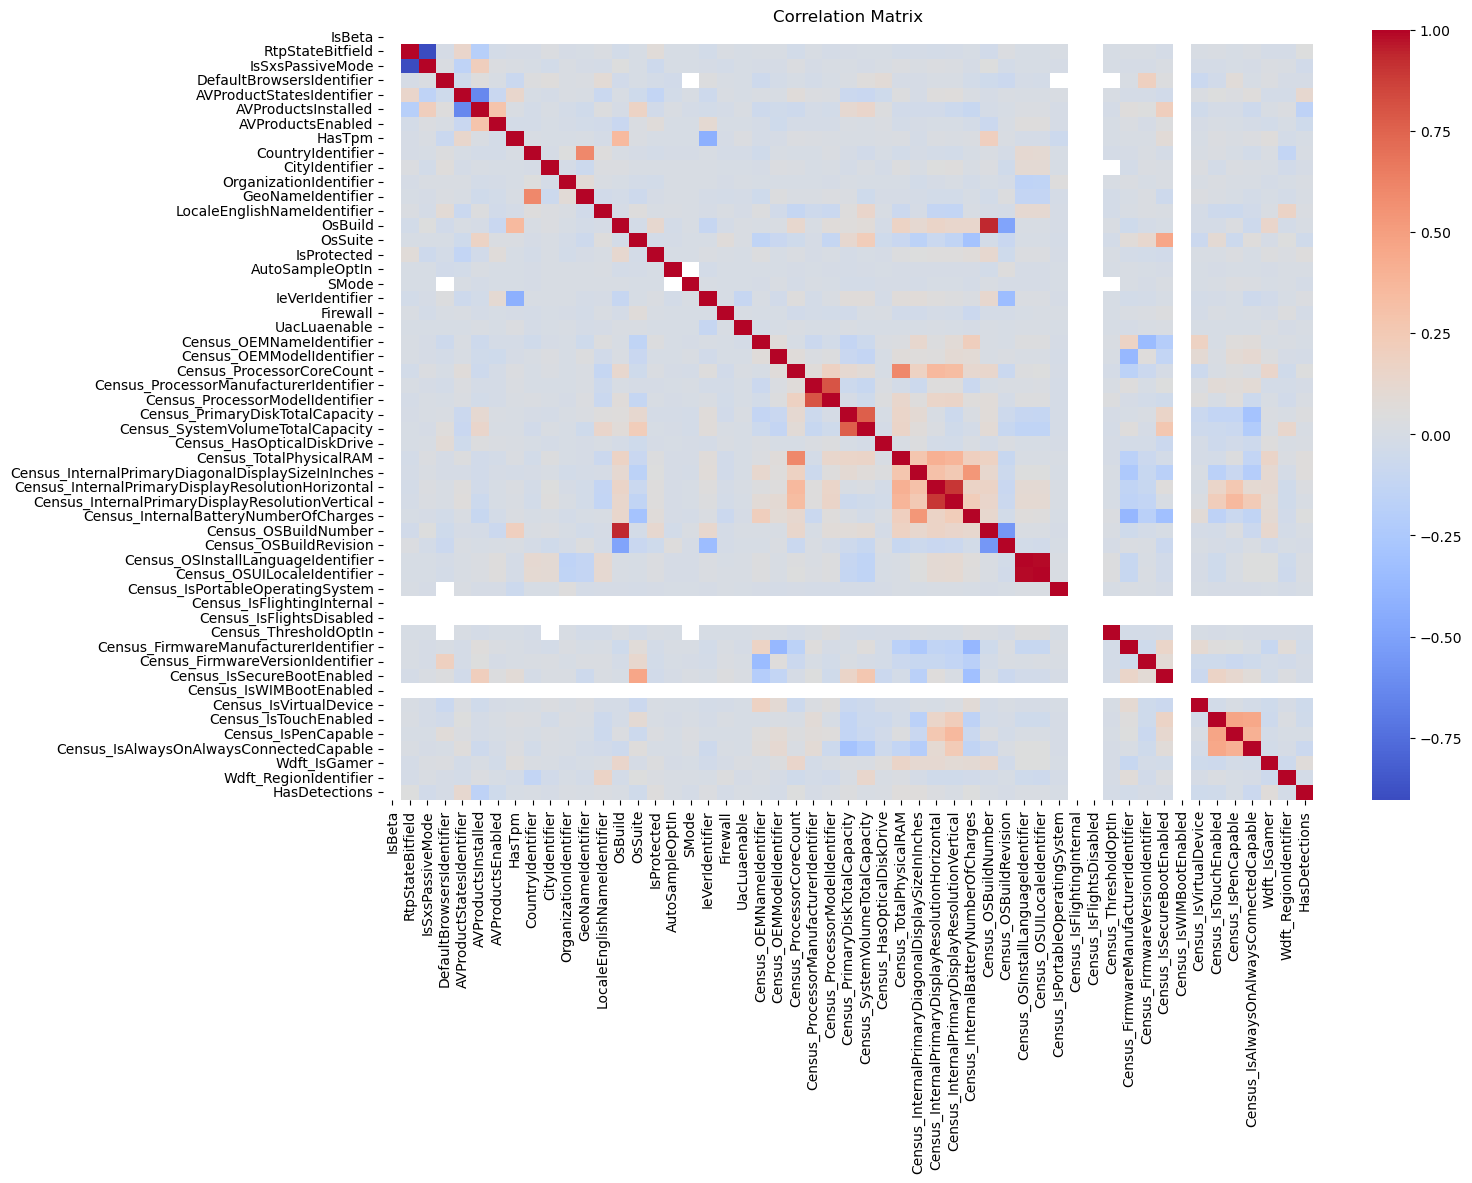


--- Contextual Insights and Recommendations ---

High-Level Overview: Several feature pairs show high correlation (absolute value > 0.2).
Detailed Technical Insights: Highly correlated features can indicate multicollinearity, which may affect model performance.
Actionable Recommendations: Consider removing or combining highly correlated features to reduce redundancy and multicollinearity.


/Users/rexcoleman/Documents/DataScienceAndMachineLearning/Rex_Coleman_Machine_Learning_Cybersecurity_Portfolio/Microsoft-Malware-Prediction-Project-2/src/analysis/data_understanding.py:754: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation with HasDetections', y='Feature', data=target_corr_df, palette='coolwarm')


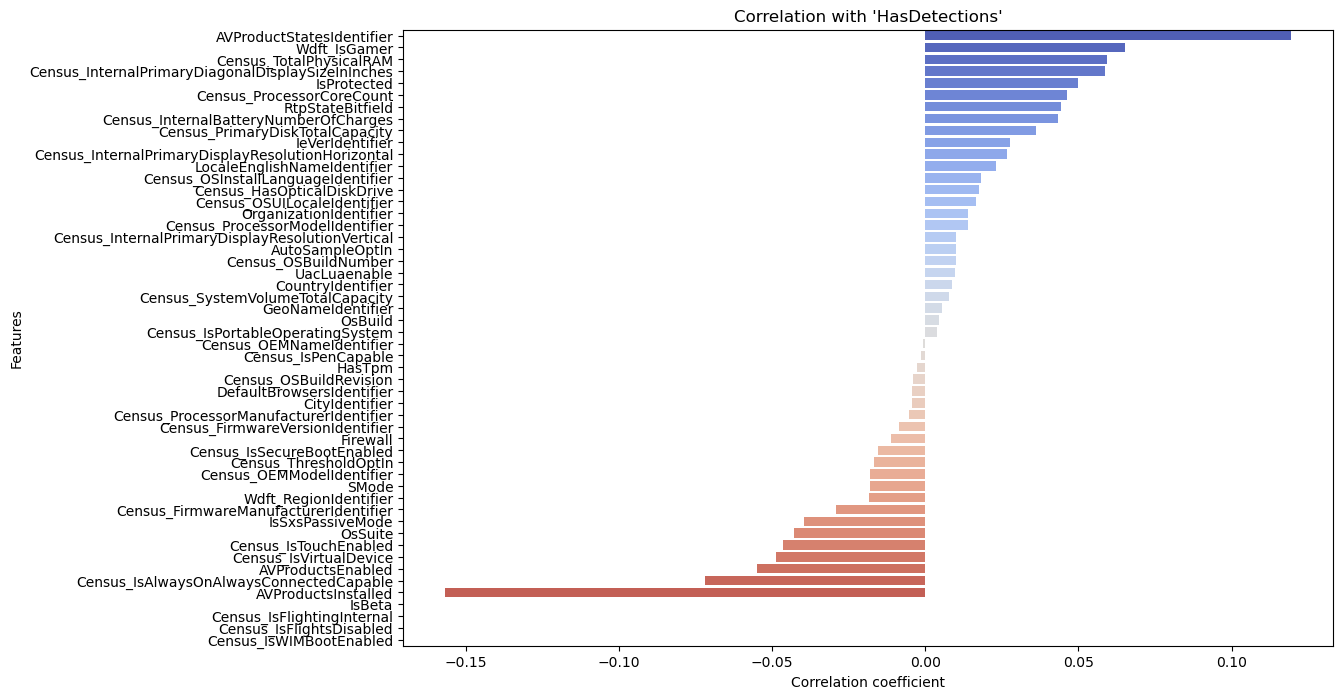


--- Contextual Insights and Recommendations ---

High-Level Overview: Some features show strong correlation with the target variable 'HasDetections'.
Detailed Technical Insights: Identifying these features can help in feature selection and engineering.
Actionable Recommendations: Consider these features for model development and further analysis.

==== Feature Interactions ====



/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


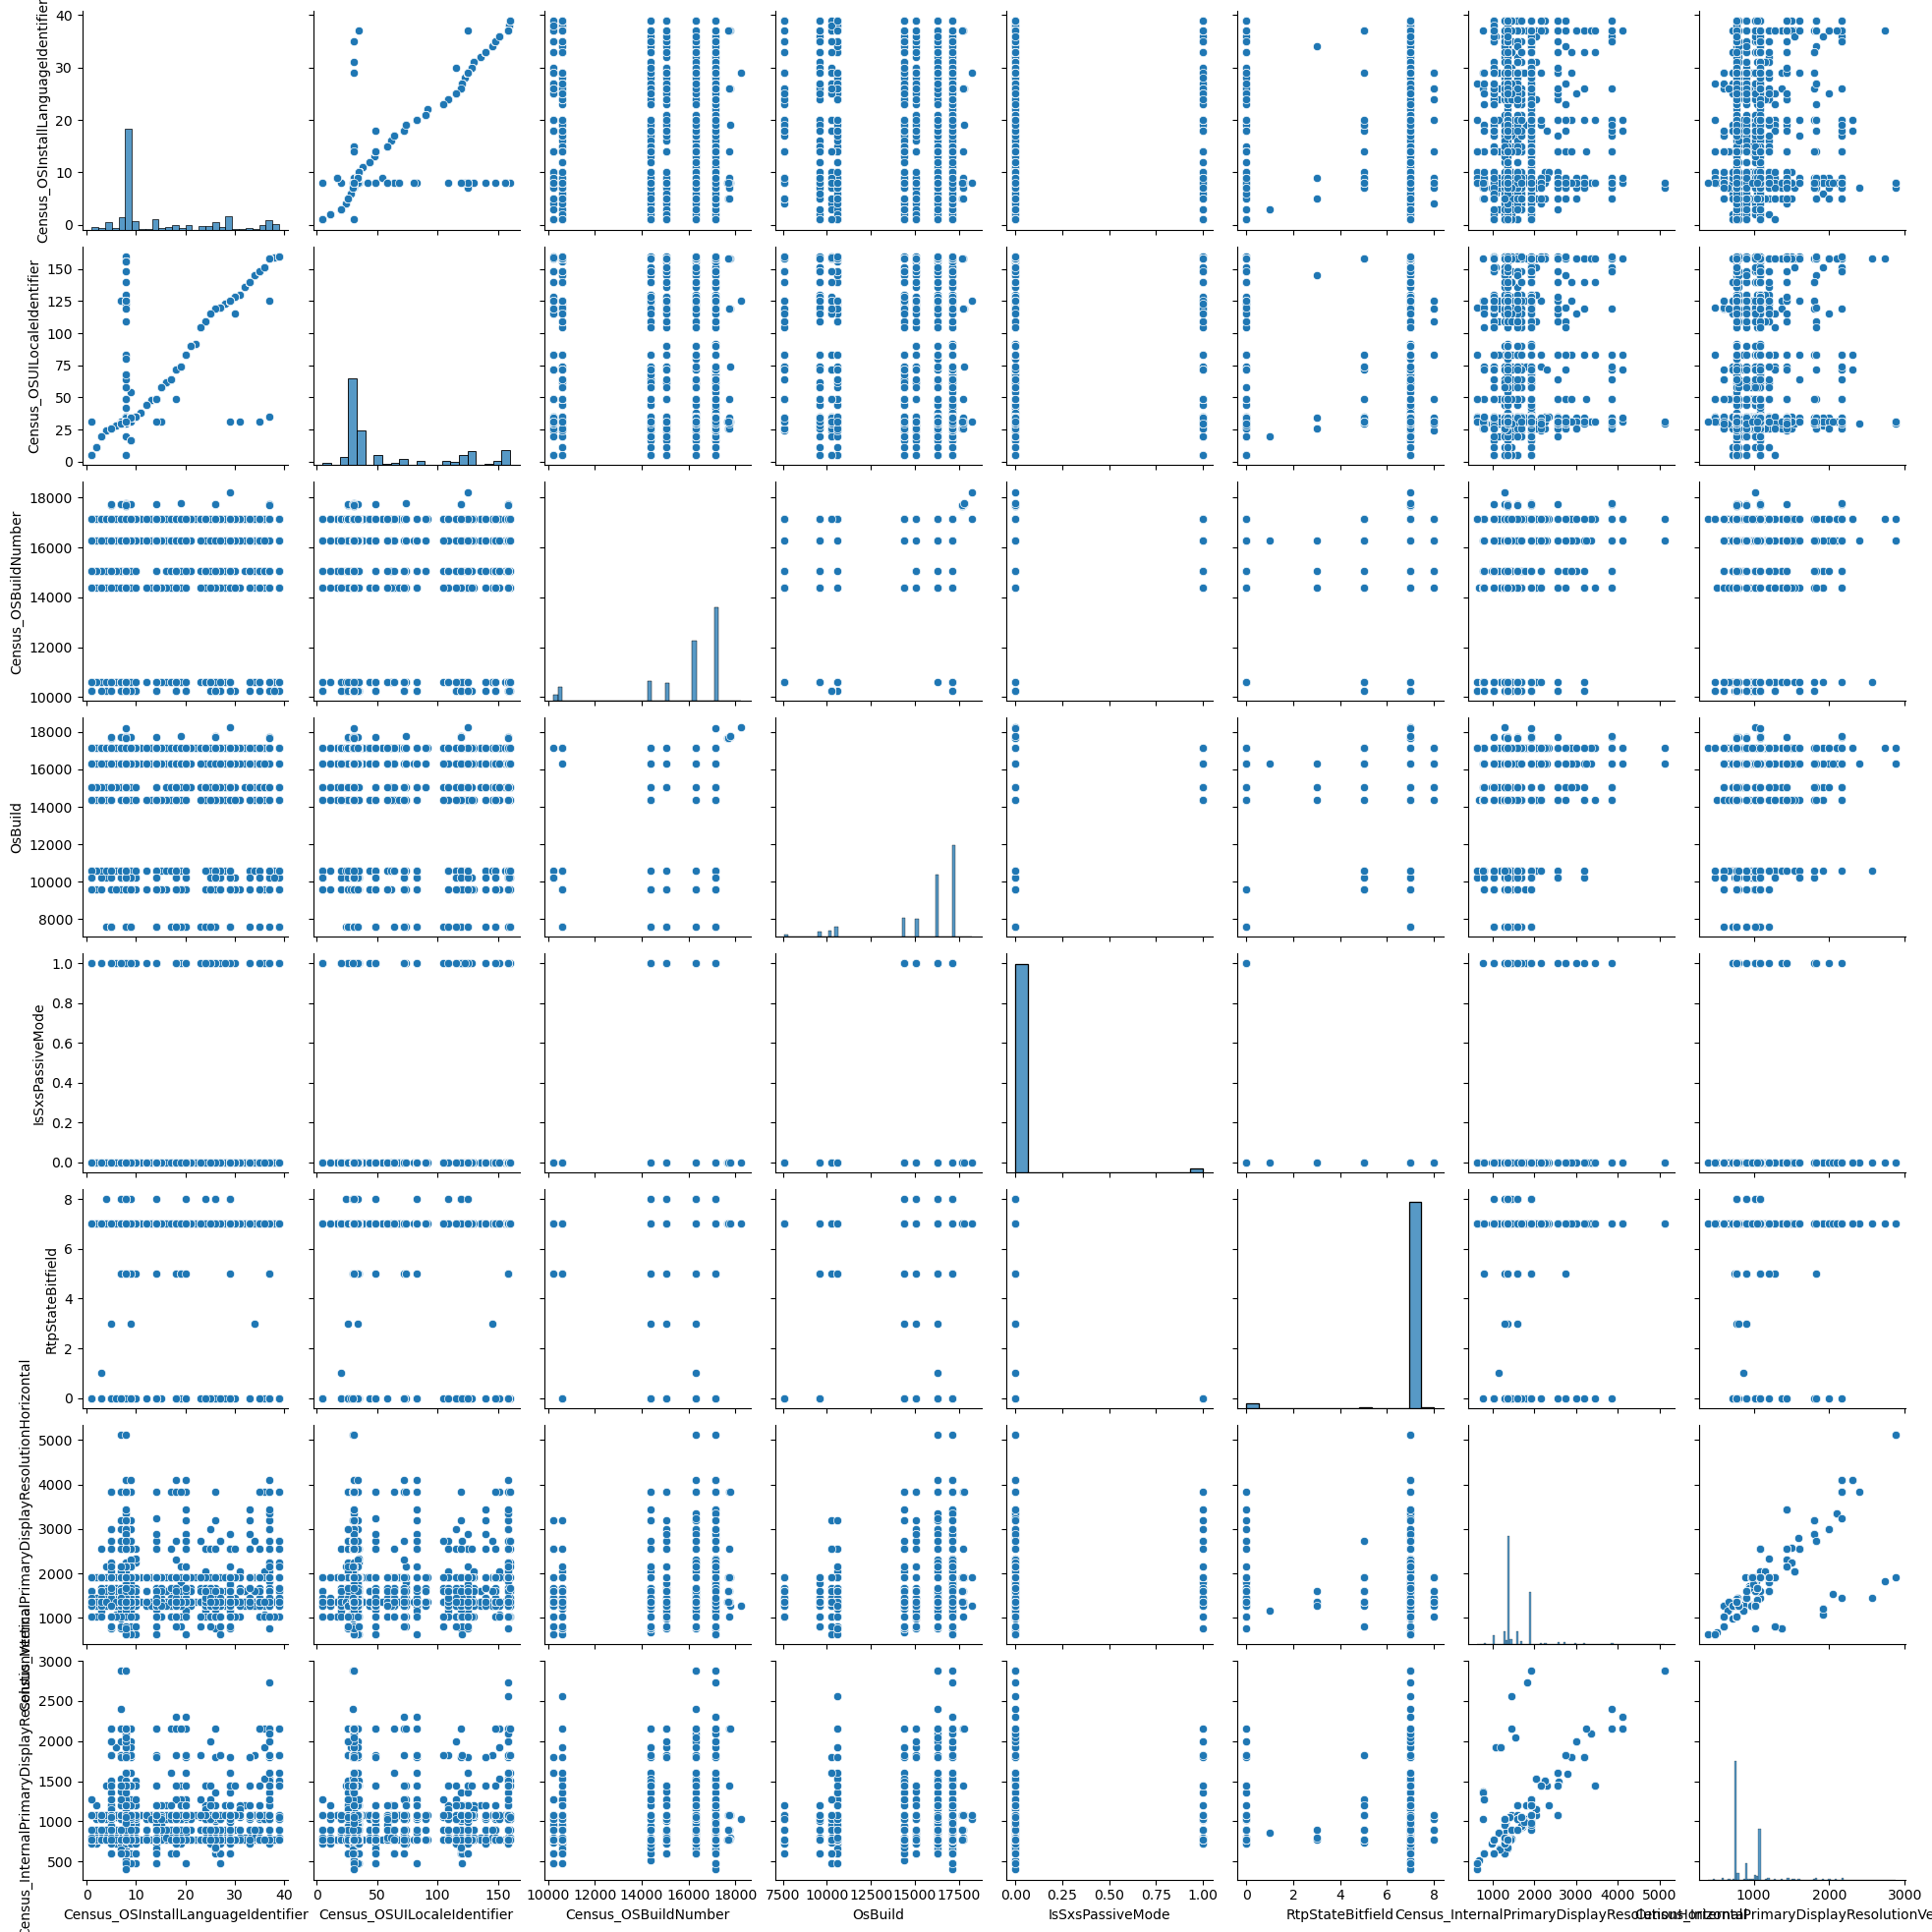


--- Contextual Insights and Recommendations ---

High-Level Overview: The pair plots visualize relationships between highly correlated features.
Detailed Technical Insights: Observing feature interactions can provide insights into underlying patterns and relationships in the data.
Actionable Recommendations: Use these insights for feature engineering or model selection, leveraging relationships between features.

==== Feature Classification ====

  Feature Type  Manual Count  Automated Count
0       Binary            21               21
1  Categorical            26               26
2    Numerical            36               36

--- Feature Classification Debugging ---

Binary Features (Manual): ['ProductName', 'IsSxsPassiveMode', 'HasTpm', 'Processor', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'Firewall', 'Census_DeviceFamily', 'Census_ProcessorManufacturerIdentifier', 'Census_HasOpticalDiskDrive', 'Census_OSArchitecture', 'Census_IsPortableOperatingSystem', 'Census_ThresholdOptIn', 

In [1]:
# notebooks/01_data_understanding/02_initial_data_understanding/02a_initial_data_understanding.ipynb

import sys
import os
import pandas as pd
import logging
from tqdm.notebook import tqdm

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def find_project_root(marker_file='src/config_loader.py'):
    """
    Locate the project root using the specified marker file.

    Parameters:
    marker_file (str): The marker file to identify the project root.
    Returns:
    str: The path to the project root directory.
    """
    current_dir = os.getcwd()
    while current_dir != os.path.dirname(current_dir):
        if os.path.isfile(os.path.join(current_dir, marker_file)):
            return current_dir
        current_dir = os.path.dirname(current_dir)
    raise FileNotFoundError(f"Marker file '{marker_file}' not found in any parent directories.")

def set_project_root():
    """Set the project root directory."""
    project_root = find_project_root()
    os.chdir(project_root)
    if project_root not in sys.path:
        sys.path.append(project_root)
    logging.info(f"Project root set to: {project_root}")
    return project_root

# Find and set the project root directory
project_root = set_project_root()

# Import setup function from custom module
from src.utils.environment_setup import setup_project_environment

# Set up the project environment
paths, directories = setup_project_environment()

# Import necessary custom modules
from src.utils.initialization import load_data_and_initialize_results
from src.analysis.initial_data_analysis import perform_data_analysis

def main(paths, pair_threshold=0.2):
    """
    Main function to perform initial data understanding.

    Parameters:
    paths (dict): Dictionary containing file paths.
    pair_threshold (float): Threshold for correlation analysis.
    """
    try:
        # Load data and initialize results
        train_sample, test_sample, paths, schema = load_data_and_initialize_results(paths)

        # Perform data analysis
        analysis_results = perform_data_analysis(train_sample, test_sample, paths['reports']['analysis_results'], pair_threshold)

        # Display analysis results
        # display_narrow_table_as_html(analysis_results, title="Initial Data Analysis Results", description="Summary of initial data analysis including correlation and distribution.")

    except Exception as e:
        logging.error(f"Error in main function: {e}", exc_info=True)

if __name__ == "__main__":
    main(paths)


2024-07-28 10:51:26,635 - INFO - Project root set to: /Users/rexcoleman/Documents/DataScienceAndMachineLearning/Rex_Coleman_Machine_Learning_Cybersecurity_Portfolio/Microsoft-Malware-Prediction-Project-2


Project root set to: /Users/rexcoleman/Documents/DataScienceAndMachineLearning/Rex_Coleman_Machine_Learning_Cybersecurity_Portfolio/Microsoft-Malware-Prediction-Project-2
Directory ensured: /Users/rexcoleman/Documents/DataScienceAndMachineLearning/Rex_Coleman_Machine_Learning_Cybersecurity_Portfolio/Microsoft-Malware-Prediction-Project-2/analysis_results

==== Data Overview ====



2024-07-28 10:51:27,305 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-28 10:51:27,310 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



==== Data Types and Formats ====

MachineIdentifier                           object
ProductName                                 object
EngineVersion                               object
AppVersion                                  object
AvSigVersion                                object
                                            ...   
Census_IsPenCapable                          int64
Census_IsAlwaysOnAlwaysConnectedCapable    float64
Wdft_IsGamer                               float64
Wdft_RegionIdentifier                      float64
HasDetections                                int64
Length: 83, dtype: object

--- Contextual Insights and Recommendations ---

High-Level Overview: The dataset includes multiple data types such as integers, floats, and objects.
Detailed Technical Insights: Ensuring data types are correctly assigned is crucial for accurate analysis and modeling.
Actionable Recommendations: Verify and correct data types if necessary before further analysis.

==== Statis

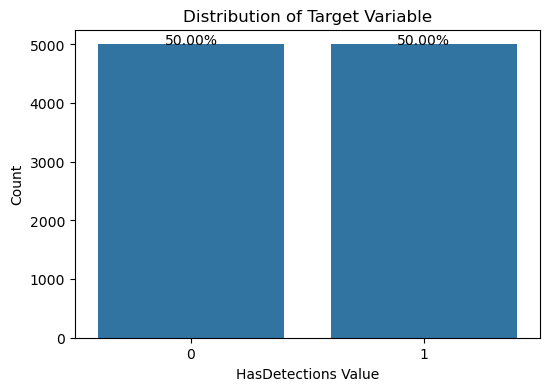

Distribution of 'HasDetections':
HasDetections
1    0.5
0    0.5
Name: proportion, dtype: float64

--- Contextual Insights and Recommendations ---

High-Level Overview: The target feature is relatively balanced.
Detailed Technical Insights: The balanced distribution is beneficial for model training as it reduces the risk of bias towards one class.
Actionable Recommendations: Proceed with model development without additional steps for handling class imbalance at this stage.

==== Missing Values Analysis ====



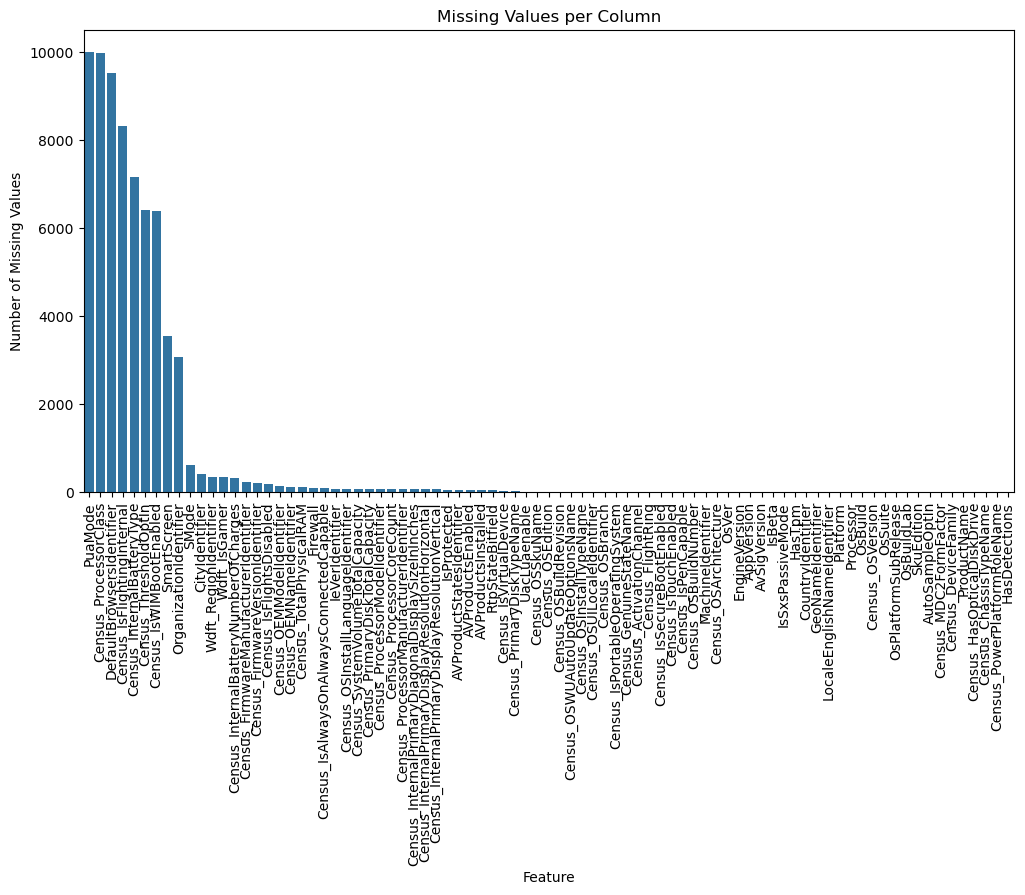

Missing Values in Train Sample:
                                                    count  percentage
PuaMode                                            9996.0       99.96
Census_ProcessorClass                              9965.0       99.65
DefaultBrowsersIdentifier                          9513.0       95.13
Census_IsFlightingInternal                         8322.0       83.22
Census_InternalBatteryType                         7145.0       71.45
Census_ThresholdOptIn                              6395.0       63.95
Census_IsWIMBootEnabled                            6382.0       63.82
SmartScreen                                        3554.0       35.54
OrganizationIdentifier                             3077.0       30.77
SMode                                               623.0        6.23
CityIdentifier                                      400.0        4.00
Wdft_RegionIdentifier                               351.0        3.51
Wdft_IsGamer                                        351.0 

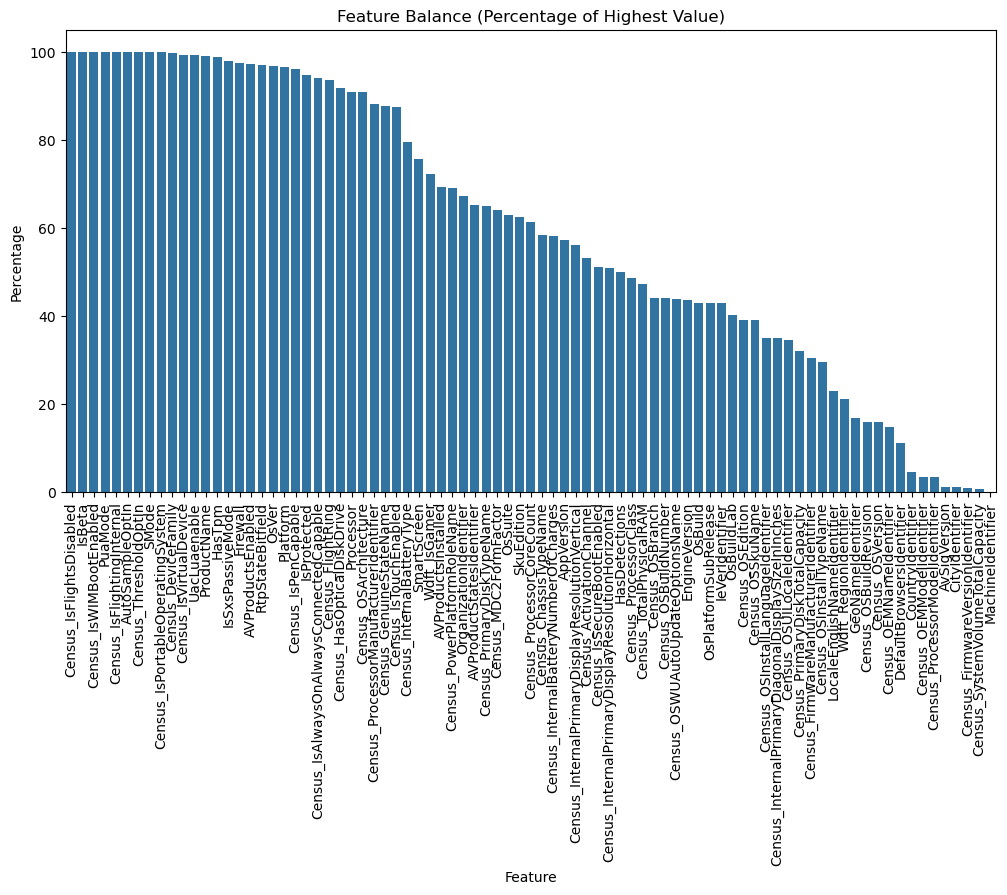

Feature Balance in Train Sample:
Census_IsFlightsDisabled            100.000000
IsBeta                              100.000000
Census_IsWIMBootEnabled             100.000000
PuaMode                             100.000000
Census_IsFlightingInternal          100.000000
                                       ...    
AvSigVersion                          1.120000
CityIdentifier                        1.104167
Census_FirmwareVersionIdentifier      0.989291
Census_SystemVolumeTotalCapacity      0.734702
MachineIdentifier                     0.010000
Length: 83, dtype: float64

--- Contextual Insights and Recommendations ---

High-Level Overview: Many features show a high percentage of a single value, indicating potential imbalance.
Detailed Technical Insights: Imbalanced features can impact the performance of machine learning models, particularly in classification tasks.
Actionable Recommendations: Consider techniques to handle imbalanced features, such as resampling, feature engineering, or

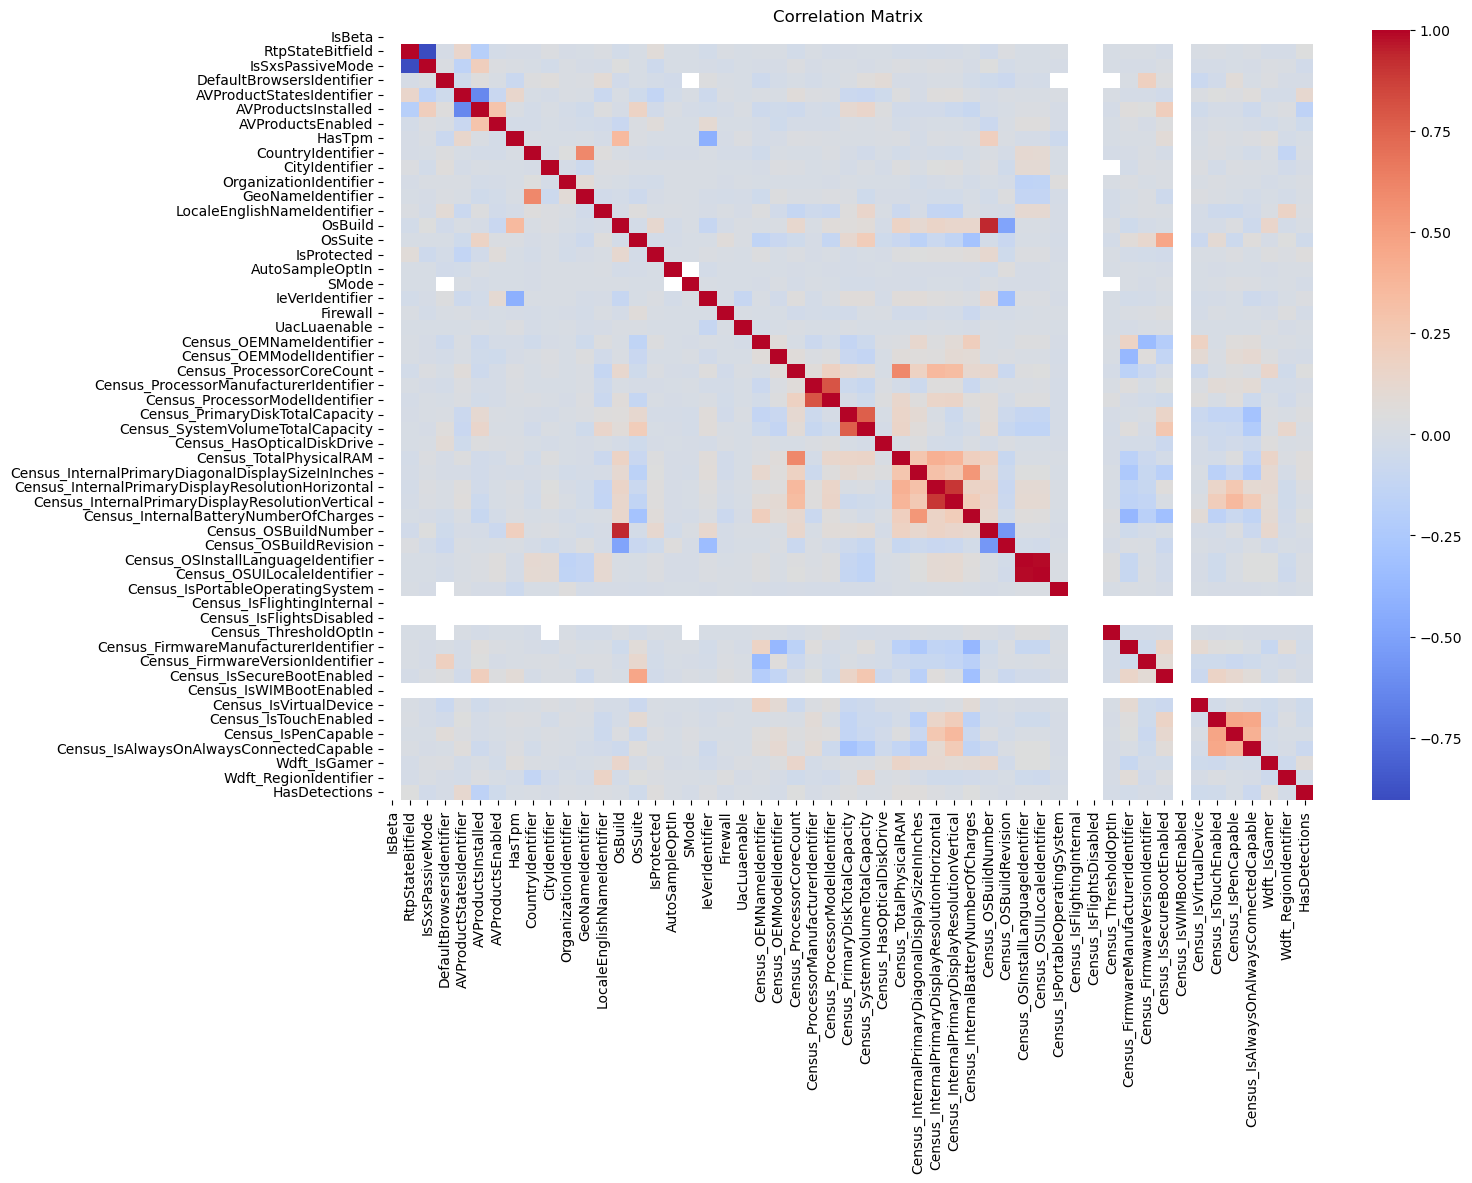


High Correlation Pairs (absolute value > 0.2 or < -0.2):

Census_OSUILocaleIdentifier                        Census_OSInstallLanguageIdentifier                   0.987031
OsBuild                                            Census_OSBuildNumber                                 0.935058
Census_InternalPrimaryDisplayResolutionHorizontal  Census_InternalPrimaryDisplayResolutionVertical      0.902729
Census_ProcessorModelIdentifier                    Census_ProcessorManufacturerIdentifier               0.799668
Census_SystemVolumeTotalCapacity                   Census_PrimaryDiskTotalCapacity                      0.766181
Census_TotalPhysicalRAM                            Census_ProcessorCoreCount                            0.605035
CountryIdentifier                                  GeoNameIdentifier                                    0.601878
Census_InternalBatteryNumberOfCharges              Census_InternalPrimaryDiagonalDisplaySizeInInches    0.536863
Census_IsTouchEnabled                

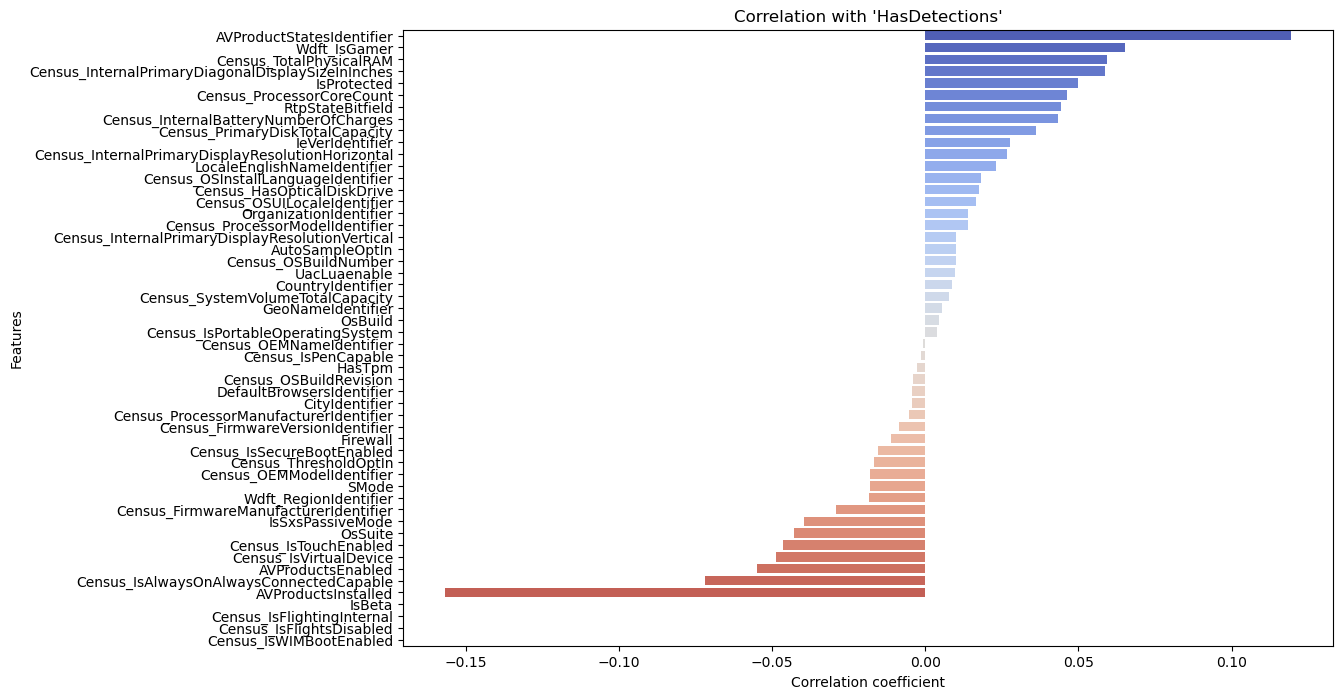


Correlation with 'HasDetections':
 AVProductStatesIdentifier                            0.119310
Wdft_IsGamer                                         0.065177
Census_TotalPhysicalRAM                              0.059275
Census_InternalPrimaryDiagonalDisplaySizeInInches    0.058817
IsProtected                                          0.049925
Census_ProcessorCoreCount                            0.046124
RtpStateBitfield                                     0.044307
Census_InternalBatteryNumberOfCharges                0.043203
Census_PrimaryDiskTotalCapacity                      0.035979
IeVerIdentifier                                      0.027692
Census_InternalPrimaryDisplayResolutionHorizontal    0.026697
LocaleEnglishNameIdentifier                          0.023063
Census_OSInstallLanguageIdentifier                   0.018194
Census_HasOpticalDiskDrive                           0.017613
Census_OSUILocaleIdentifier                          0.016699
OrganizationIdentifier            

/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


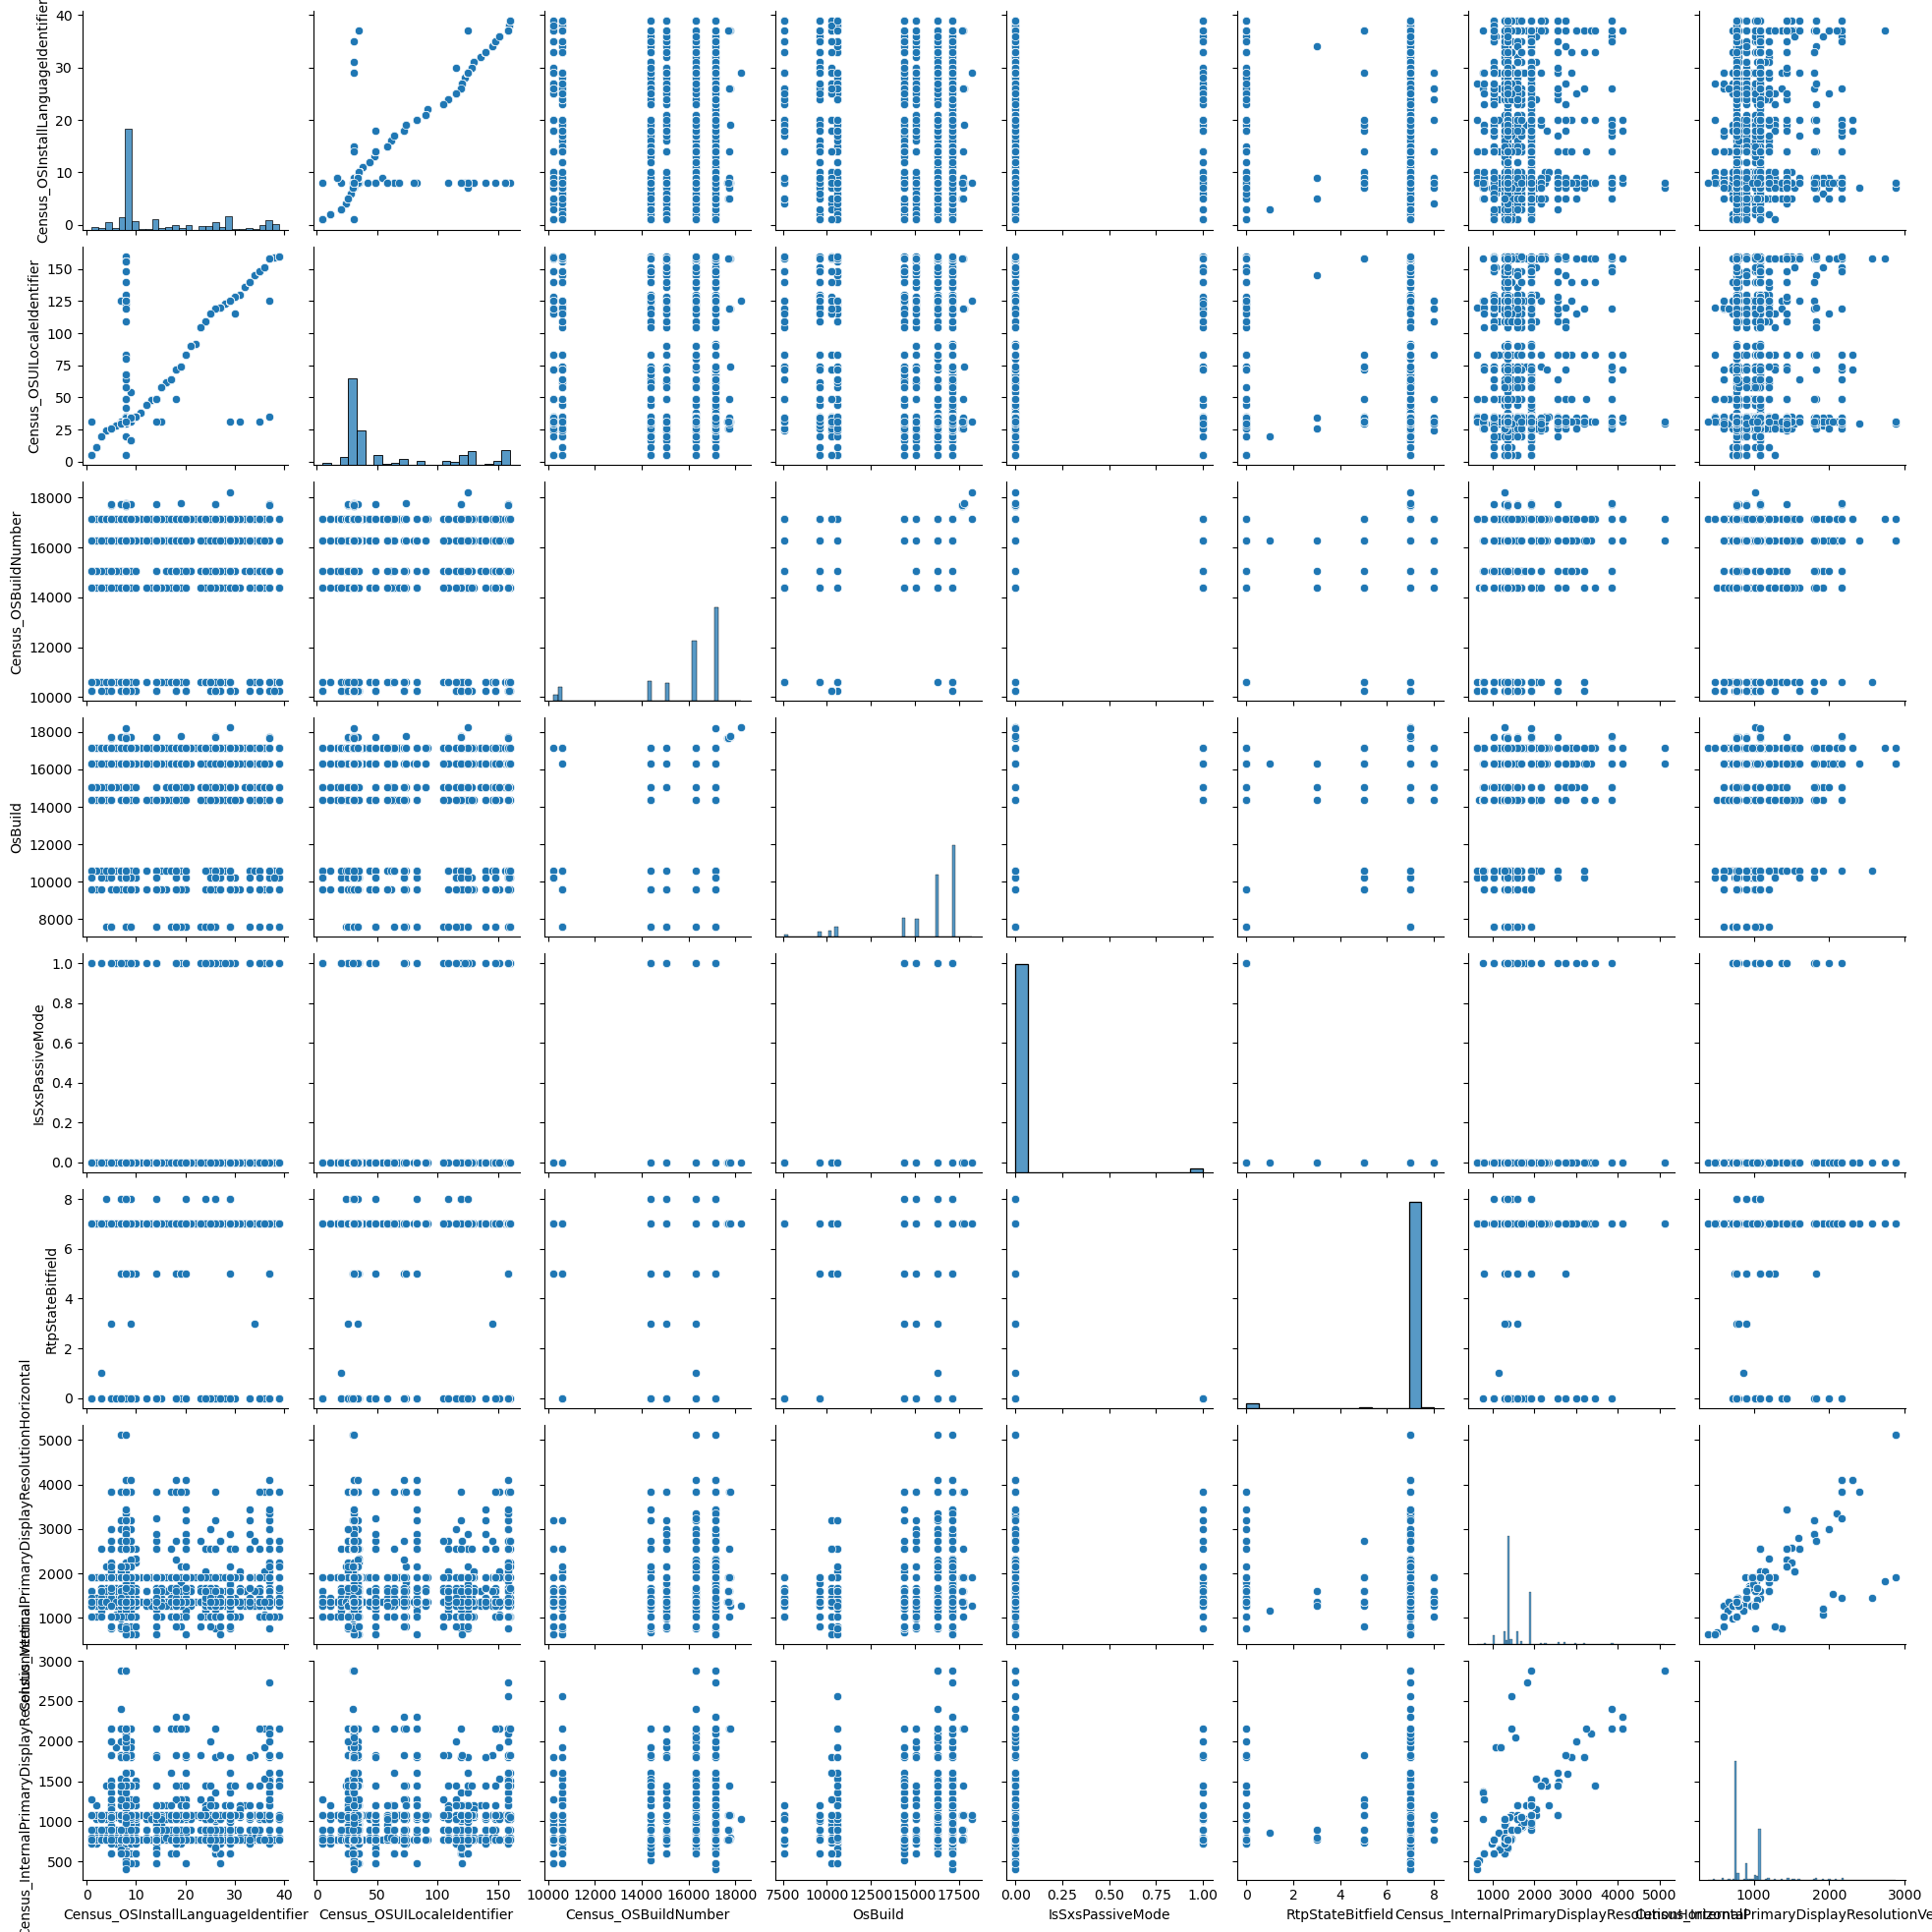


--- Contextual Insights and Recommendations ---

High-Level Overview: The pair plots visualize relationships between highly correlated features.
Detailed Technical Insights: Observing feature interactions can provide insights into underlying patterns and relationships in the data.
Actionable Recommendations: Use these insights for feature engineering or model selection, leveraging relationships between features.

==== Feature Classification ====

  Feature Type  Manual Count  Automated Count
0       Binary            21               21
1  Categorical            26               26
2    Numerical            36               36

--- Feature Classification Debugging ---

Binary Features (Manual): ['ProductName', 'IsSxsPassiveMode', 'HasTpm', 'Processor', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'Firewall', 'Census_DeviceFamily', 'Census_ProcessorManufacturerIdentifier', 'Census_HasOpticalDiskDrive', 'Census_OSArchitecture', 'Census_IsPortableOperatingSystem', 'Census_ThresholdOptIn', 

In [2]:
# notebooks/01_data_understanding/02_initial_data_understanding/02a_initial_data_understanding.ipynb

import sys
import os
import pandas as pd
import logging
from tqdm.notebook import tqdm

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def find_project_root(marker_file='src/config_loader.py'):
    """
    Locate the project root using the specified marker file.

    Parameters:
    marker_file (str): The marker file to identify the project root.
    Returns:
    str: The path to the project root directory.
    """
    current_dir = os.getcwd()
    while current_dir != os.path.dirname(current_dir):
        if os.path.isfile(os.path.join(current_dir, marker_file)):
            return current_dir
        current_dir = os.path.dirname(current_dir)
    raise FileNotFoundError(f"Marker file '{marker_file}' not found in any parent directories.")

def set_project_root():
    """Set the project root directory."""
    project_root = find_project_root()
    os.chdir(project_root)
    if project_root not in sys.path:
        sys.path.append(project_root)
    logging.info(f"Project root set to: {project_root}")
    return project_root

# Find and set the project root directory
project_root = set_project_root()

# Import setup function from custom module
from src.utils.environment_setup import setup_project_environment

# Set up the project environment
paths, directories = setup_project_environment()

# Import necessary custom modules
from src.utils.environment_setup import setup_project_environment
from src.utils.display_utils import display_dataframe_as_html
from src.utils.initialization import load_data_and_initialize_results
from src.analysis.initial_data_analysis import perform_data_analysis

def main(paths, pair_threshold=0.2):
    """
    Main function to perform initial data understanding.

    Parameters:
    paths (dict): Dictionary containing file paths.
    pair_threshold (float): Threshold for correlation analysis.
    """
    try:
        # Load data and initialize results
        train_sample, test_sample, paths, schema = load_data_and_initialize_results(paths)

        # Perform data analysis
        analysis_results = perform_data_analysis(train_sample, test_sample, paths['reports']['analysis_results'], pair_threshold)

    except Exception as e:
        logging.error(f"Error in main function: {e}", exc_info=True)

if __name__ == "__main__":
    main(paths)


2024-07-27 17:36:38,358 - INFO - Project root set to: /Users/rexcoleman/Documents/DataScienceAndMachineLearning/Rex_Coleman_Machine_Learning_Cybersecurity_Portfolio/Microsoft-Malware-Prediction-Project-2


Project root set to: /Users/rexcoleman/Documents/DataScienceAndMachineLearning/Rex_Coleman_Machine_Learning_Cybersecurity_Portfolio/Microsoft-Malware-Prediction-Project-2
Directory ensured: /Users/rexcoleman/Documents/DataScienceAndMachineLearning/Rex_Coleman_Machine_Learning_Cybersecurity_Portfolio/Microsoft-Malware-Prediction-Project-2/analysis_results

==== Data Overview ====

Data Loaded: Train Sample Shape: (10000, 83) Test Sample Shape: (10000, 82)
Number of rows in train sample: 10000
Number of columns in train sample: 83
Column names in train sample: ['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRe

2024-07-27 17:36:38,667 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-27 17:36:38,674 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



==== Statistical Summary ====

                       MachineIdentifier   ProductName EngineVersion  \
count                              10000         10000         10000   
unique                             10000             2            34   
top     22c036eac3c2b993950f3b86937ec38b  win8defender   1.1.15200.1   
freq                                   1          9900          4359   
mean                                 NaN           NaN           NaN   
std                                  NaN           NaN           NaN   
min                                  NaN           NaN           NaN   
25%                                  NaN           NaN           NaN   
50%                                  NaN           NaN           NaN   
75%                                  NaN           NaN           NaN   
max                                  NaN           NaN           NaN   

             AppVersion  AvSigVersion   IsBeta  RtpStateBitfield  \
count             10000         100

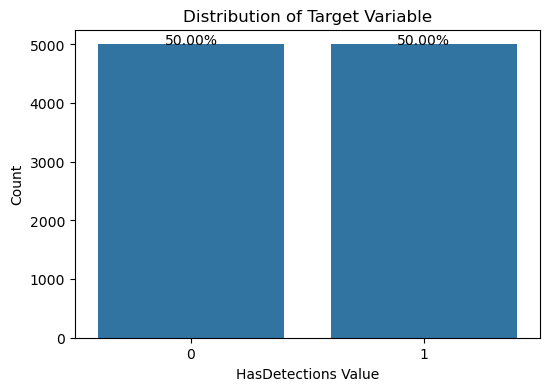

Distribution of 'HasDetections':
HasDetections
1    0.5
0    0.5
Name: proportion, dtype: float64

--- Contextual Insights and Recommendations ---

High-Level Overview: The target feature is relatively balanced.
Detailed Technical Insights: The balanced distribution is beneficial for model training as it reduces the risk of bias towards one class.
Actionable Recommendations: Proceed with model development without additional steps for handling class imbalance at this stage.

==== Missing Values Analysis ====



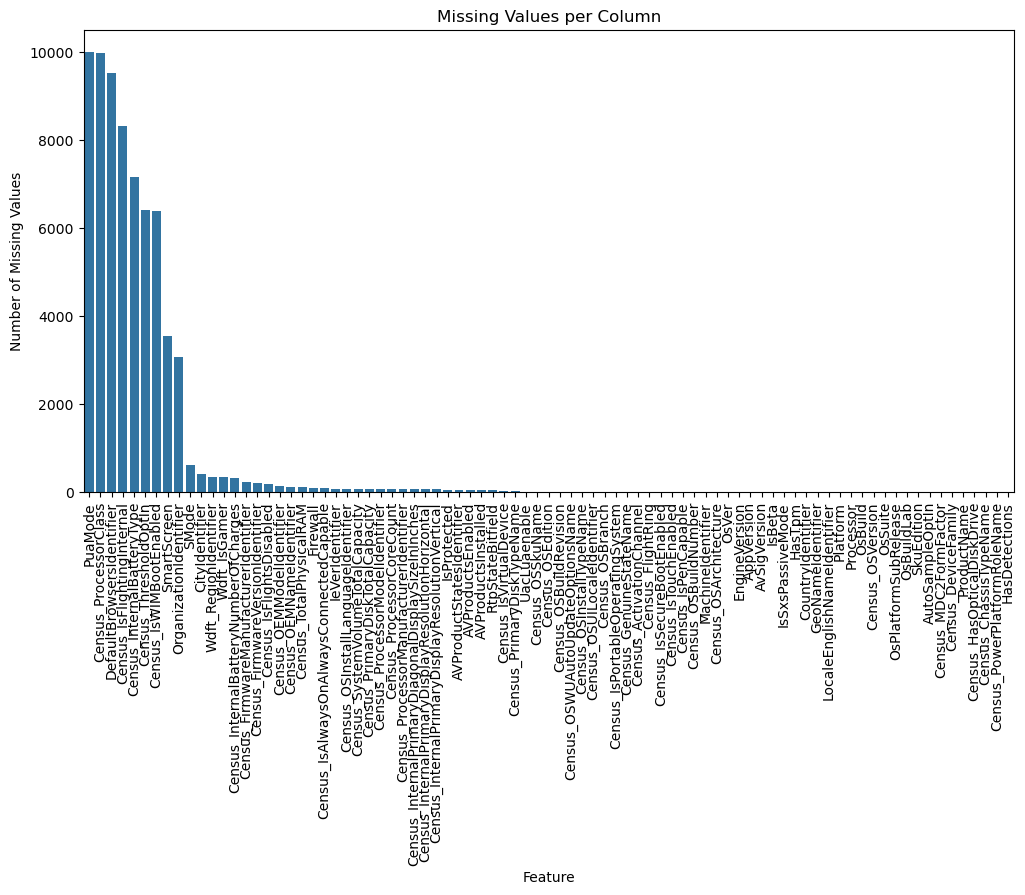

Missing Values in Train Sample:
                                                    count  percentage
PuaMode                                            9996.0       99.96
Census_ProcessorClass                              9965.0       99.65
DefaultBrowsersIdentifier                          9513.0       95.13
Census_IsFlightingInternal                         8322.0       83.22
Census_InternalBatteryType                         7145.0       71.45
Census_ThresholdOptIn                              6395.0       63.95
Census_IsWIMBootEnabled                            6382.0       63.82
SmartScreen                                        3554.0       35.54
OrganizationIdentifier                             3077.0       30.77
SMode                                               623.0        6.23
CityIdentifier                                      400.0        4.00
Wdft_RegionIdentifier                               351.0        3.51
Wdft_IsGamer                                        351.0 

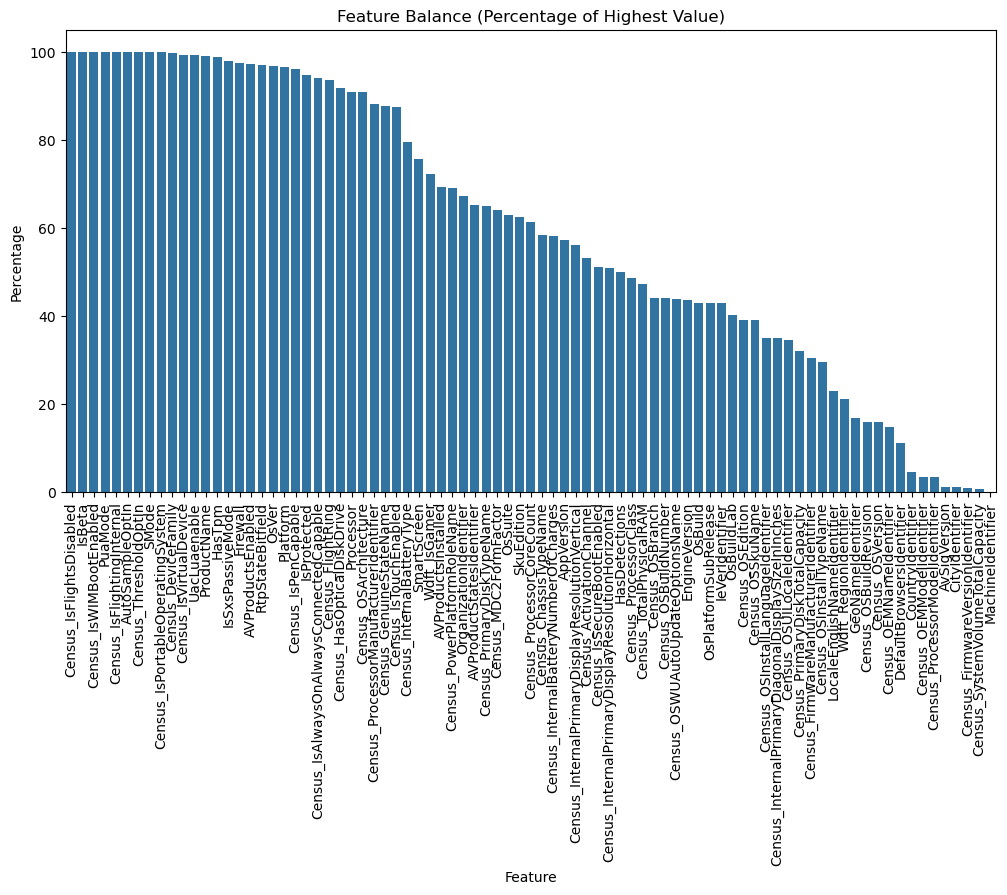

Feature Balance in Train Sample:
Census_IsFlightsDisabled            100.000000
IsBeta                              100.000000
Census_IsWIMBootEnabled             100.000000
PuaMode                             100.000000
Census_IsFlightingInternal          100.000000
                                       ...    
AvSigVersion                          1.120000
CityIdentifier                        1.104167
Census_FirmwareVersionIdentifier      0.989291
Census_SystemVolumeTotalCapacity      0.734702
MachineIdentifier                     0.010000
Length: 83, dtype: float64

--- Contextual Insights and Recommendations ---

High-Level Overview: Many features show a high percentage of a single value, indicating potential imbalance.
Detailed Technical Insights: Imbalanced features can impact the performance of machine learning models, particularly in classification tasks.
Actionable Recommendations: Consider techniques to handle imbalanced features, such as resampling, feature engineering, or

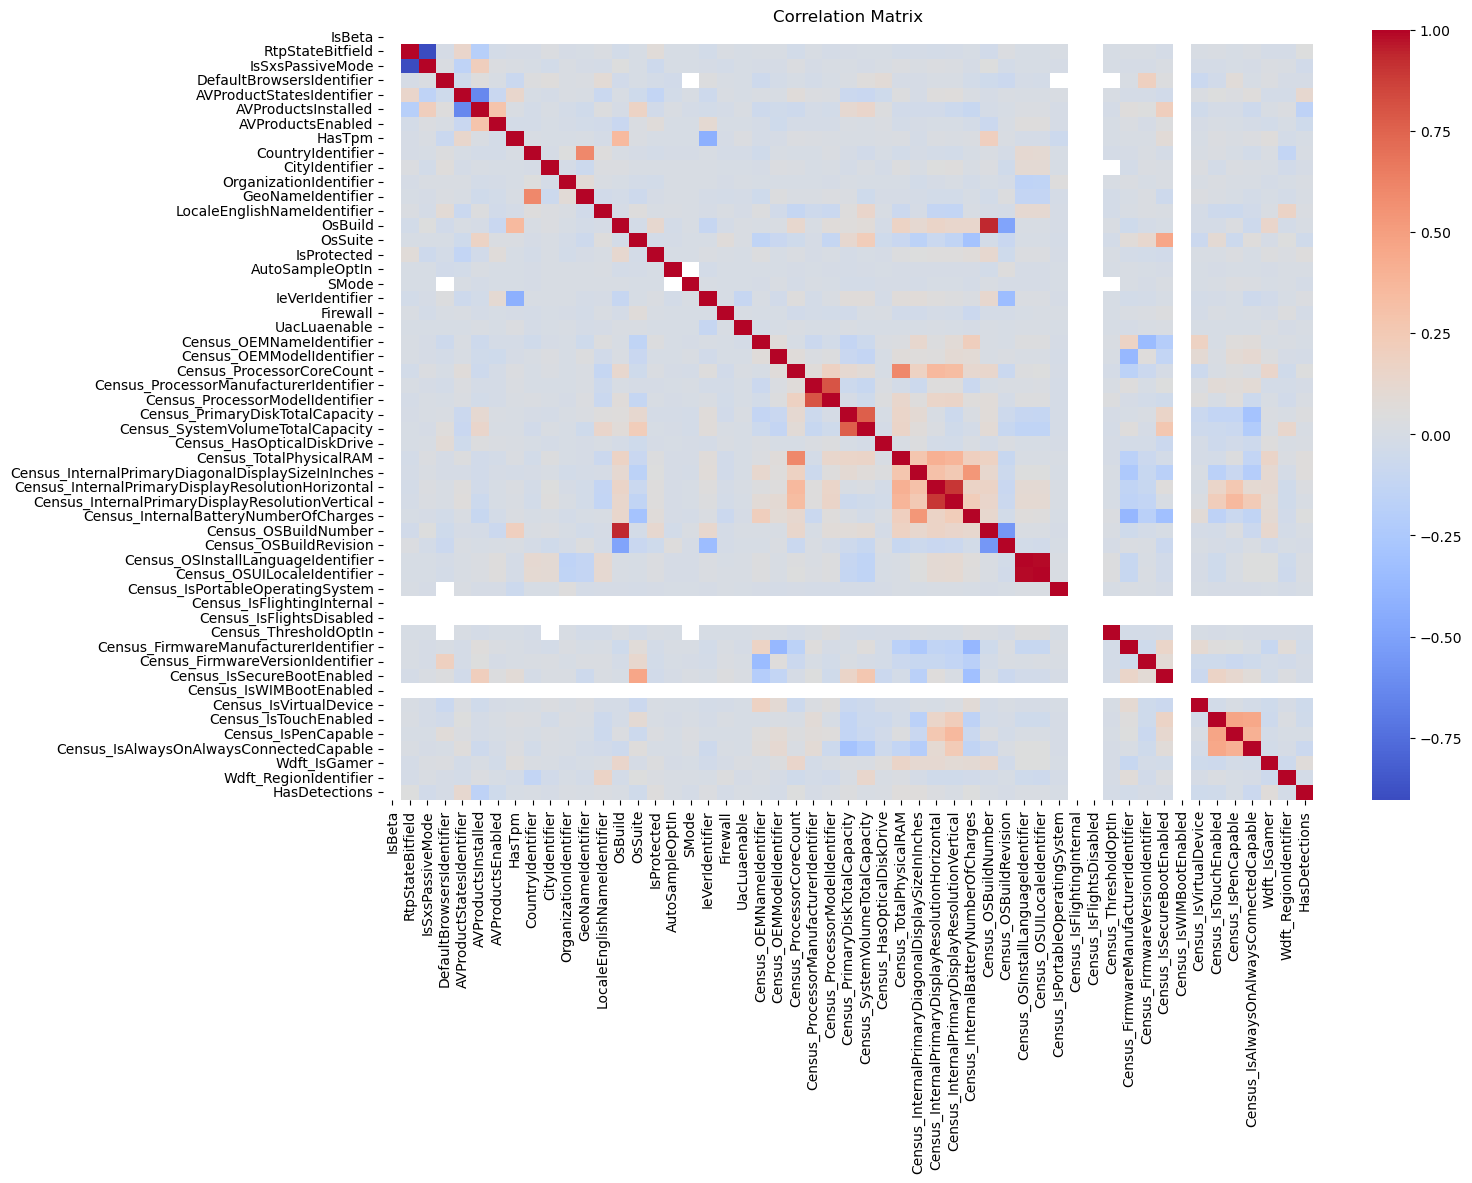


High Correlation Pairs (absolute value > 0.2 or < -0.2):

Census_OSUILocaleIdentifier                        Census_OSInstallLanguageIdentifier                   0.987031
OsBuild                                            Census_OSBuildNumber                                 0.935058
Census_InternalPrimaryDisplayResolutionHorizontal  Census_InternalPrimaryDisplayResolutionVertical      0.902729
Census_ProcessorModelIdentifier                    Census_ProcessorManufacturerIdentifier               0.799668
Census_SystemVolumeTotalCapacity                   Census_PrimaryDiskTotalCapacity                      0.766181
Census_TotalPhysicalRAM                            Census_ProcessorCoreCount                            0.605035
CountryIdentifier                                  GeoNameIdentifier                                    0.601878
Census_InternalBatteryNumberOfCharges              Census_InternalPrimaryDiagonalDisplaySizeInInches    0.536863
Census_IsTouchEnabled                

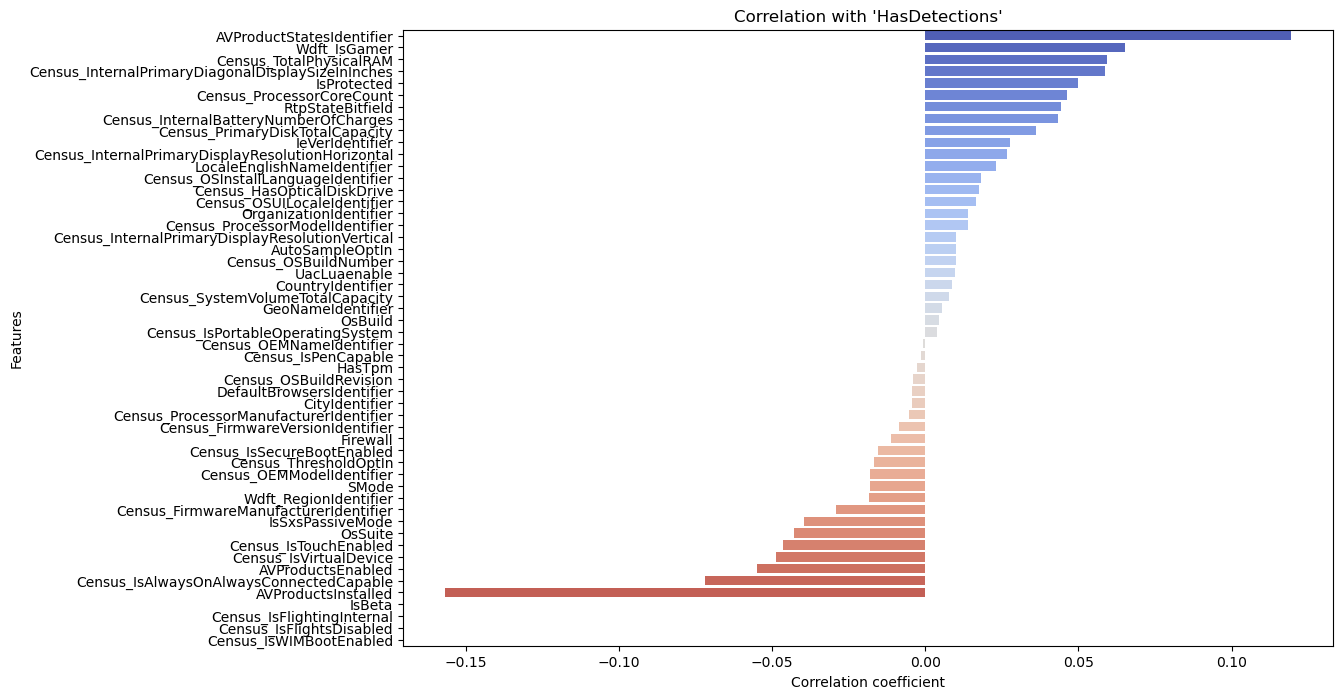


Correlation with 'HasDetections':
 AVProductStatesIdentifier                            0.119310
Wdft_IsGamer                                         0.065177
Census_TotalPhysicalRAM                              0.059275
Census_InternalPrimaryDiagonalDisplaySizeInInches    0.058817
IsProtected                                          0.049925
Census_ProcessorCoreCount                            0.046124
RtpStateBitfield                                     0.044307
Census_InternalBatteryNumberOfCharges                0.043203
Census_PrimaryDiskTotalCapacity                      0.035979
IeVerIdentifier                                      0.027692
Census_InternalPrimaryDisplayResolutionHorizontal    0.026697
LocaleEnglishNameIdentifier                          0.023063
Census_OSInstallLanguageIdentifier                   0.018194
Census_HasOpticalDiskDrive                           0.017613
Census_OSUILocaleIdentifier                          0.016699
OrganizationIdentifier            

/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


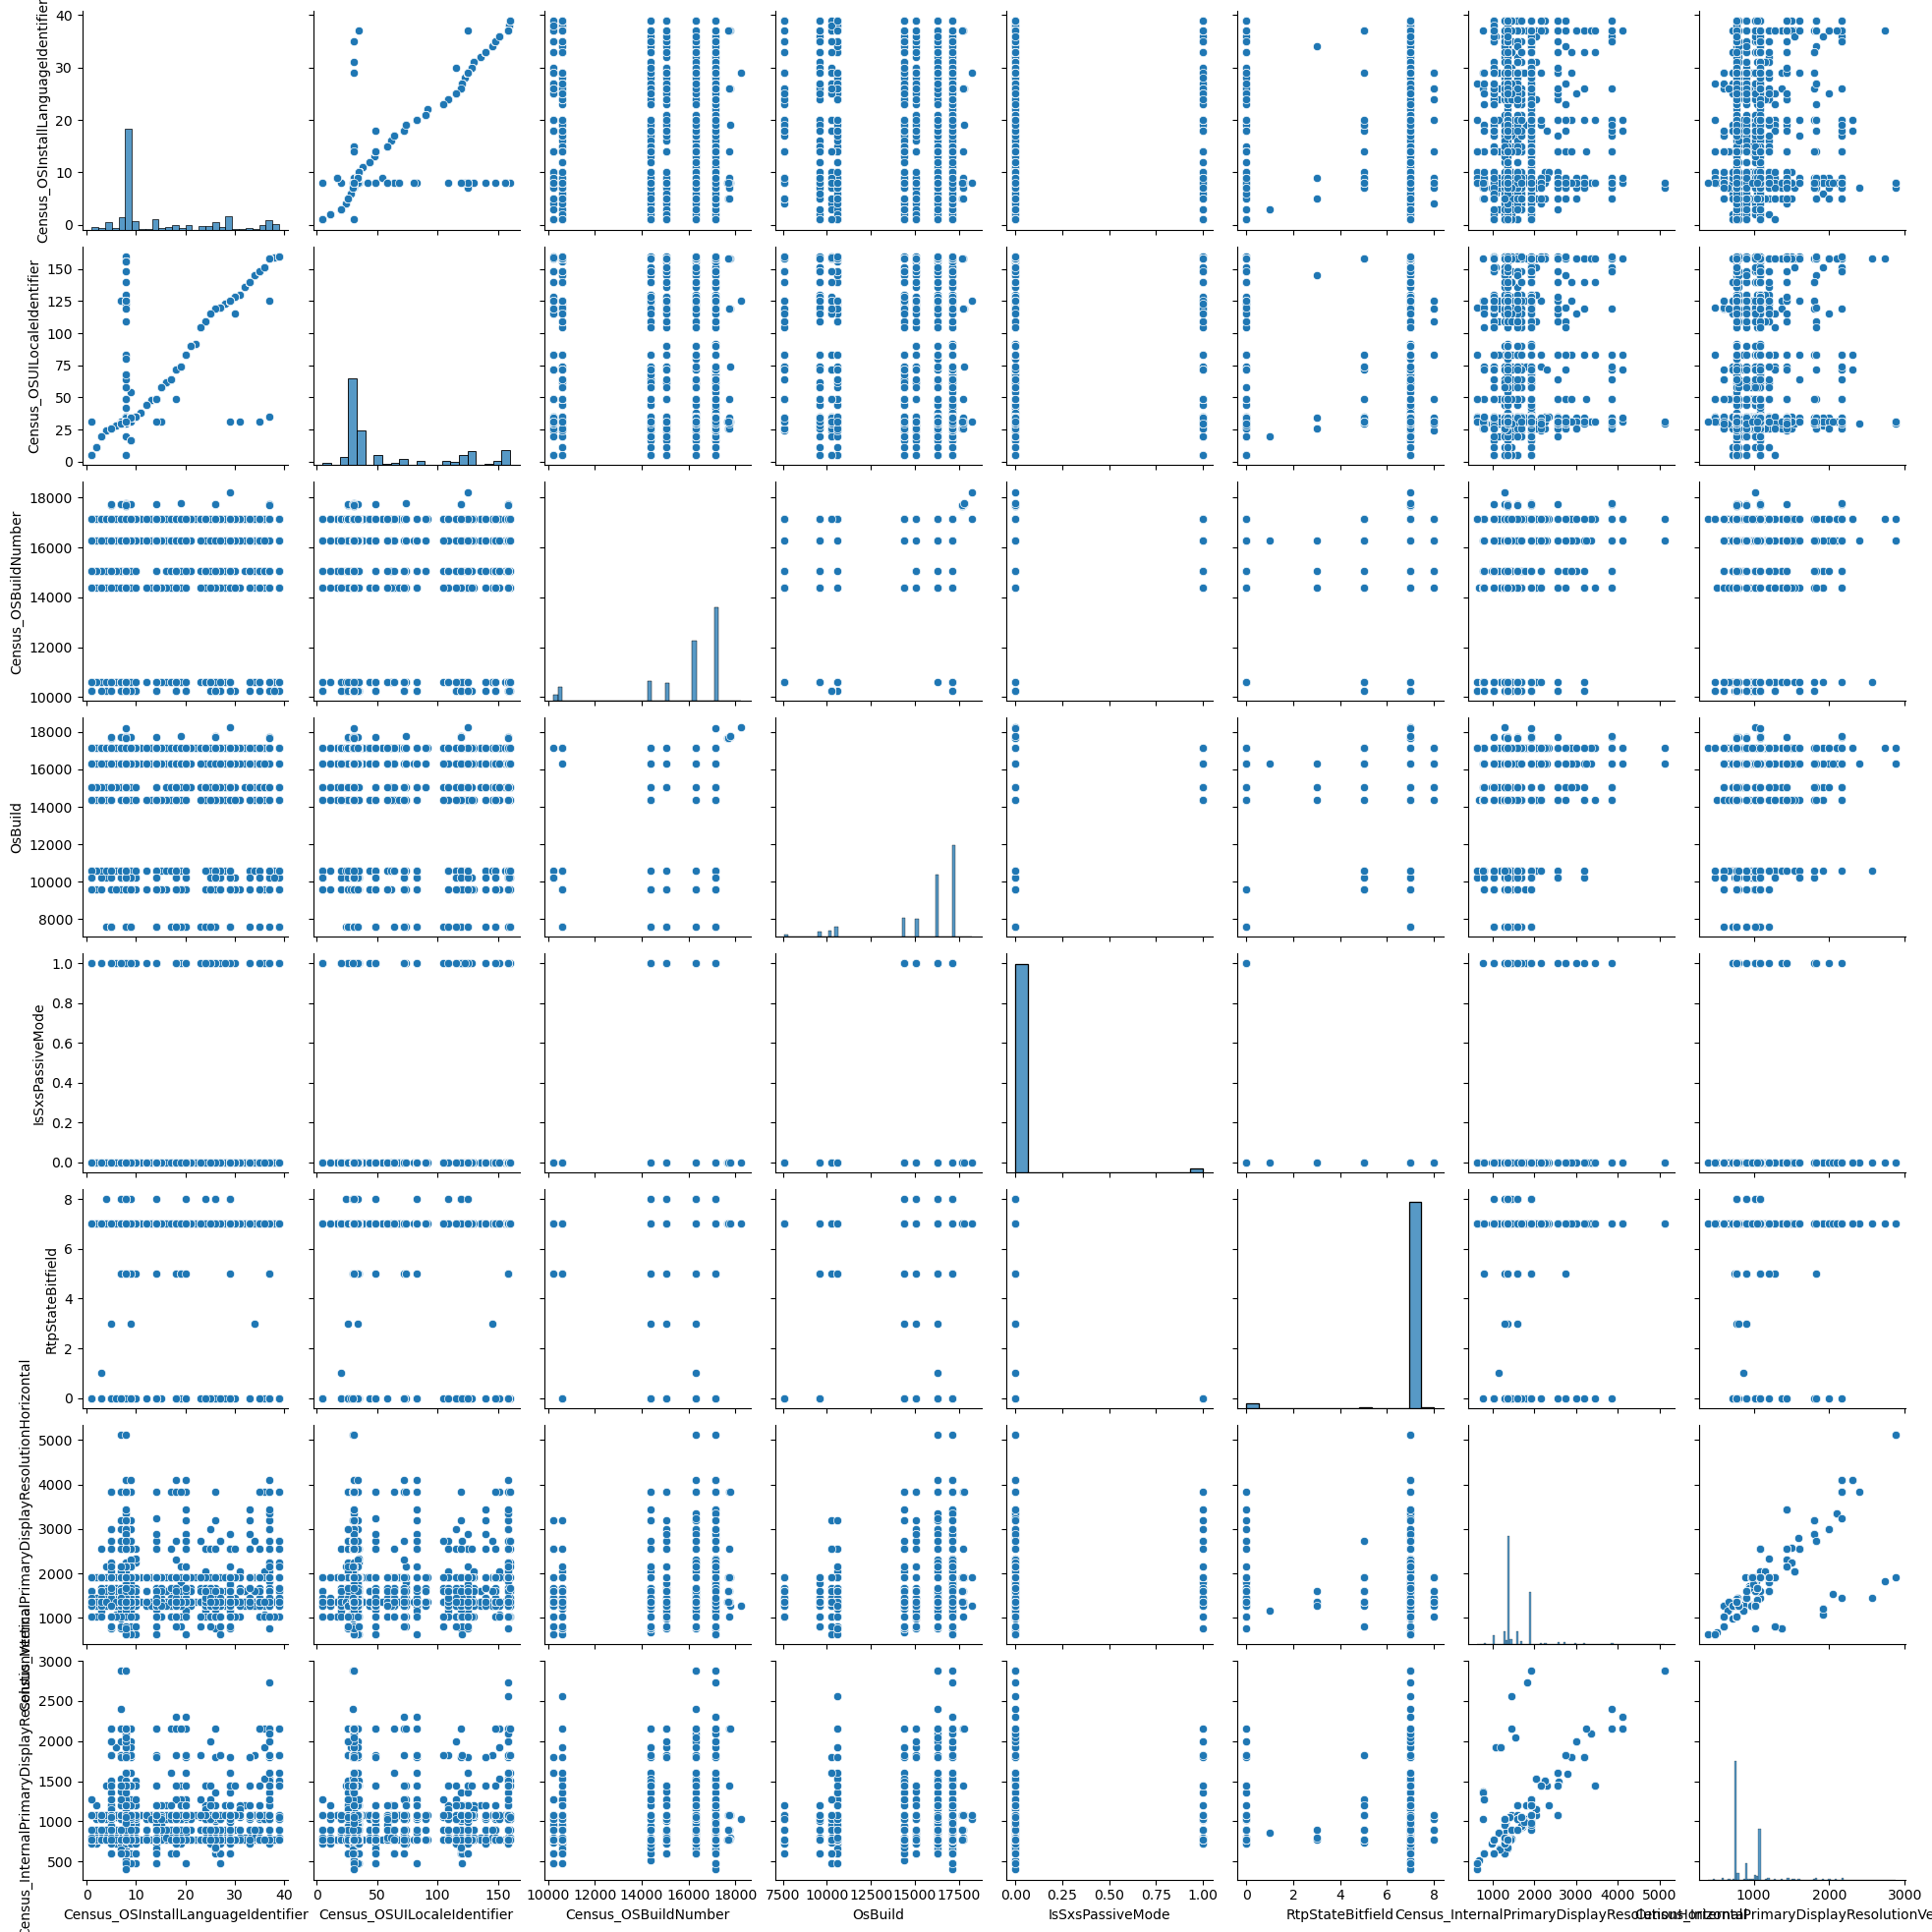


--- Contextual Insights and Recommendations ---

High-Level Overview: The pair plots visualize relationships between highly correlated features.
Detailed Technical Insights: Observing feature interactions can provide insights into underlying patterns and relationships in the data.
Actionable Recommendations: Use these insights for feature engineering or model selection, leveraging relationships between features.

==== Feature Classification ====

  Feature Type  Manual Count  Automated Count
0       Binary            21               21
1  Categorical            26               26
2    Numerical            36               36

--- Feature Classification Debugging ---

Binary Features (Manual): ['ProductName', 'IsSxsPassiveMode', 'HasTpm', 'Processor', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'Firewall', 'Census_DeviceFamily', 'Census_ProcessorManufacturerIdentifier', 'Census_HasOpticalDiskDrive', 'Census_OSArchitecture', 'Census_IsPortableOperatingSystem', 'Census_ThresholdOptIn', 

In [2]:
# notebooks/01_data_understanding/02_initial_data_understanding/02a_initial_data_understanding.ipynb

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Locate the project root using the marker file 'src/config_loader.py'
def find_project_root(marker_file='src/config_loader.py'):
    """
    Locate the project root using the specified marker file.

    Parameters:
    marker_file (str): The marker file to identify the project root.
    Returns:
    str: The path to the project root directory.
    """
    current_dir = os.getcwd()
    while current_dir != os.path.dirname(current_dir):
        if os.path.isfile(os.path.join(current_dir, marker_file)):
            return current_dir
        current_dir = os.path.dirname(current_dir)
    raise FileNotFoundError(f"Marker file '{marker_file}' not found in any parent directories.")

# Find and set the project root directory
project_root = find_project_root('src/config_loader.py')
if project_root not in sys.path:
    sys.path.append(project_root)
os.chdir(project_root)  # Ensure the working directory is set to project root
logging.info(f"Project root set to: {project_root}")

# Import setup function from custom module
from src.utils.environment_setup import setup_project_environment

# Set up the project environment
paths, directories = setup_project_environment()

# Import necessary custom modules
from src.utils.initialization import load_data_and_initialize_results
from src.analysis.initial_data_analysis import perform_data_analysis

def main(paths, pair_threshold=0.2):
    """
    Main function to perform initial data understanding.

    Parameters:
    paths (dict): Dictionary containing file paths.
    pair_threshold (float): Threshold for correlation analysis.
    """
    try:
        # Load data and initialize results
        train_sample, test_sample, paths, schema = load_data_and_initialize_results(paths)

        # Perform data analysis
        perform_data_analysis(train_sample, test_sample, paths['reports']['analysis_results'], pair_threshold)

    except Exception as e:
        logging.error(f"Error in main function: {e}", exc_info=True)

if __name__ == "__main__":
    main(paths)